## Setting up
- Import Relevant Libraries
- Reading csv files

In [1]:
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
acc_data = pd.read_csv("Step Up - Experian Account Data.csv")
acc_holder = pd.read_csv("Step Up - Experian Acount Holder Data.csv")
mule_flag = pd.read_csv("Mule Flag.csv")

Display dataset

In [3]:
acc_data.head()

,Identifier,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
0,ID_0001,19.0,NaN,305.0,230.0,288.0,39.0,7.0,2.0,0.0
1,ID_0002,3.0,24989.0,331.0,203.0,147.0,5.0,NaN,4.0,2.0
2,ID_0003,NaN,10915.0,109.0,43.0,227.0,37.0,4.0,1.0,1.0
3,ID_0004,19.0,43552.0,87.0,149.0,236.0,168.0,1.0,2.0,1.0
4,ID_0005,9.0,19990.0,NaN,49.0,37.0,99.0,9.0,3.0,2.0


In [4]:
len(acc_data), len(acc_data.dropna())

(1000, 611)

In [5]:
acc_holder.head()

,Identifier,DateOfBirth,Gender,Income,CreditScore,LoanAmount,EmploymentStatus,MaritalStatus,OccupancyStatus,NumDependents,SocialMediaUsageHours,ShoppingFrequencyPerMonth,HealthInsuranceStatus
0,ID_0001,06/01/1964,Female,96534.0,NaN,44116.0,Unemployed,Single,Owner,3.0,21.0,9.0,Yes
1,ID_0002,26/11/2004,Male,75106.0,390.0,9782.0,Unemployed,NaN,Owner,2.0,9.0,10.0,No
2,ID_0003,02/07/1992,Male,50678.0,779.0,38650.0,Student,Divorced,Owner,3.0,16.0,5.0,Yes
3,ID_0004,03/07/1974,Male,96218.0,757.0,22366.0,Student,Single,Owner,1.0,21.0,0.0,No
4,ID_0005,13/05/1976,Male,83230.0,750.0,28557.0,Employed,Single,Owner,1.0,11.0,5.0,No


In [6]:
len(acc_holder), len(acc_holder.dropna())

(1045, 550)

In [7]:
mule_flag.head()

,Identifier,MuleAccount
0,ID_0001,0.0
1,ID_0002,0.0
2,ID_0003,NaN
3,ID_0004,NaN
4,ID_0005,0.0


In [8]:
len(mule_flag), len(mule_flag.dropna())

(1000, 948)

## Data Audit

Reusable Functions

In [9]:
def correlation_plot(df):
    df_select = df.iloc[:, 1:].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(df_select,
                cmap = 'coolwarm',
                annot = True,
                vmin = -0.1,
                vmax = 0.1,
                center = 0,
                linewidths = 0.5)

### Account Data

In [10]:
acc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Identifier          1000 non-null   object 
 1   AccountLength       948 non-null    float64
 2   AverageBalance      948 non-null    float64
 3   NumTransactions     948 non-null    float64
 4   NumDeposits         948 non-null    float64
 5   NumWithdrawals      948 non-null    float64
 6   NumTransfers        948 non-null    float64
 7   NumLoans            948 non-null    float64
 8   NumCreditCards      949 non-null    float64
 9   NumSavingsAccounts  948 non-null    float64
dtypes: float64(9), object(1)
memory usage: 78.3+ KB


In [11]:
duplicate_count = acc_data['Identifier'].duplicated().sum()

In [12]:
duplicate_count

0

In [13]:
acc_data.isnull().sum()

Identifier             0
AccountLength         52
AverageBalance        52
NumTransactions       52
NumDeposits           52
NumWithdrawals        52
NumTransfers          52
NumLoans              52
NumCreditCards        51
NumSavingsAccounts    52
dtype: int64

Checking Data Correlation

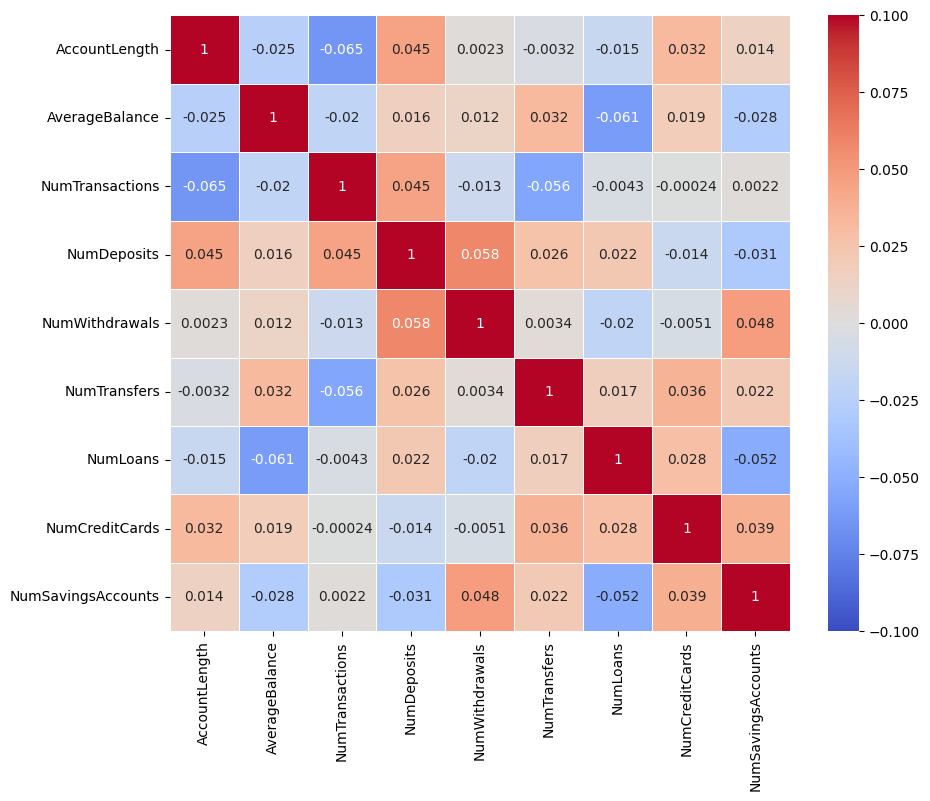

In [14]:
correlation_plot(acc_data)

Notice there are only very weak correlation between features - we cannot predict one feature from another.

Try using imputation method for missing data.

Visualising Distibution of Data

In [15]:
summ_acc_data = acc_data.describe()
summ_acc_data

,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,949.000000,948.000000
mean,15.103376,25481.985232,252.247890,153.948312,152.660338,98.294304,4.670886,2.076923,0.988397
std,8.332952,13936.320951,141.995191,85.569836,83.936786,58.319106,2.872018,1.431040,0.805782
min,1.000000,1082.000000,10.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,13586.750000,129.000000,81.750000,81.000000,49.000000,2.000000,1.000000,0.000000
50%,15.000000,25654.000000,252.000000,154.000000,151.500000,93.000000,5.000000,2.000000,1.000000
75%,22.000000,37293.000000,375.250000,230.000000,220.250000,150.000000,7.000000,3.000000,2.000000
max,29.000000,49908.000000,498.000000,299.000000,299.000000,199.000000,9.000000,4.000000,2.000000


Data Imputation

By Rule of Thumb - k = sqrt(n)/2 where in this case k ~= 15

In [16]:
imputer = KNNImputer(n_neighbors=15)
acc_data_imputed = imputer.fit_transform(acc_data.iloc[:, 1:])

In [17]:
acc_data_imputed = pd.DataFrame(acc_data_imputed, columns = acc_data.iloc[:, 1:].columns)

In [18]:
acc_data_imputed.head()

,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
0,19.000000,24184.8,305.0,230.0,288.0,39.0,7.000000,2.0,0.0
1,3.000000,24989.0,331.0,203.0,147.0,5.0,5.333333,4.0,2.0
2,17.933333,10915.0,109.0,43.0,227.0,37.0,4.000000,1.0,1.0
3,19.000000,43552.0,87.0,149.0,236.0,168.0,1.000000,2.0,1.0
4,9.000000,19990.0,236.8,49.0,37.0,99.0,9.000000,3.0,2.0


In [30]:
acc_data_final = pd.concat([acc_data['Identifier'], acc_data_imputed], axis=1)

In [31]:
acc_data_final.head()

,Identifier,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
0,ID_0001,19.000000,24184.8,305.0,230.0,288.0,39.0,7.000000,2.0,0.0
1,ID_0002,3.000000,24989.0,331.0,203.0,147.0,5.0,5.333333,4.0,2.0
2,ID_0003,17.933333,10915.0,109.0,43.0,227.0,37.0,4.000000,1.0,1.0
3,ID_0004,19.000000,43552.0,87.0,149.0,236.0,168.0,1.000000,2.0,1.0
4,ID_0005,9.000000,19990.0,236.8,49.0,37.0,99.0,9.000000,3.0,2.0


Bins Creation
- Create bins to seperate the numerical data into multiple categories for easier visualisations

In [32]:
acc_data_final = acc_data_final.set_index("Identifier")
acc_data_final.head()

,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
Identifier,,,,,,,,,
ID_0001,19.000000,24184.8,305.0,230.0,288.0,39.0,7.000000,2.0,0.0
ID_0002,3.000000,24989.0,331.0,203.0,147.0,5.0,5.333333,4.0,2.0
ID_0003,17.933333,10915.0,109.0,43.0,227.0,37.0,4.000000,1.0,1.0
ID_0004,19.000000,43552.0,87.0,149.0,236.0,168.0,1.000000,2.0,1.0
ID_0005,9.000000,19990.0,236.8,49.0,37.0,99.0,9.000000,3.0,2.0


Create function to separate bins

In [27]:
def data_in_range(x, step):
    lower = (x // step) * step
    upper = lower + step - 1
    return f'{int(lower)}-{int(upper)}'

def data_separator(df, col, step):
    df[col] = df[col].apply(lambda x: data_in_range(x, step = step))

In [33]:
data_separator(acc_data_final, "AccountLength", 5)
data_separator(acc_data_final, "AverageBalance", 10000)
data_separator(acc_data_final, "NumTransactions", 100)
data_separator(acc_data_final, "NumDeposits", 50)
data_separator(acc_data_final, "NumWithdrawals", 50)
data_separator(acc_data_final, "NumTransfers", 50)

In [35]:
acc_data_final.head()

,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts
Identifier,,,,,,,,,
ID_0001,15-19,20000-29999,300-399,200-249,250-299,0-49,7.000000,2.0,0.0
ID_0002,0-4,20000-29999,300-399,200-249,100-149,0-49,5.333333,4.0,2.0
ID_0003,15-19,10000-19999,100-199,0-49,200-249,0-49,4.000000,1.0,1.0
ID_0004,15-19,40000-49999,0-99,100-149,200-249,150-199,1.000000,2.0,1.0
ID_0005,5-9,10000-19999,200-299,0-49,0-49,50-99,9.000000,3.0,2.0


### Account Holder

In [21]:
acc_holder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Identifier                 1045 non-null   object 
 1   DateOfBirth                991 non-null    object 
 2   Gender                     992 non-null    object 
 3   Income                     989 non-null    float64
 4   CreditScore                987 non-null    float64
 5   LoanAmount                 990 non-null    float64
 6   EmploymentStatus           987 non-null    object 
 7   MaritalStatus              989 non-null    object 
 8   OccupancyStatus            990 non-null    object 
 9   NumDependents              990 non-null    float64
 10  SocialMediaUsageHours      985 non-null    float64
 11  ShoppingFrequencyPerMonth  990 non-null    float64
 12  HealthInsuranceStatus      989 non-null    object 
dtypes: float64(6), object(7)
memory usage: 106.3+ KB

In [22]:
duplicate_count = acc_holder['Identifier'].duplicated().sum()

In [23]:
duplicate_count

45

Mule Flag

In [12]:
mule_flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Identifier   1000 non-null   object 
 1   MuleAccount  948 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
mule_flag['MuleAccount'].unique()

array([ 0., nan,  1.])

In [19]:
mule_dropna = mule_flag.dropna()